In [164]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image


In [143]:
#Read Image

img = cv2.imread('melanoma/118.jpg')


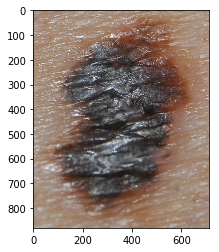

In [144]:
#Display Image

img2 = img[:,:,::-1]
plt.imshow(img2)


In [145]:
#resized image 

resized_image = cv2.resize(img, (300,300)) 

In [146]:
#Display Image


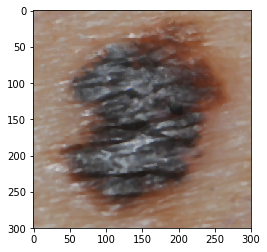

In [147]:
# apply the 3x3 median filter on the image

processed_image = cv2.medianBlur(resized_image, 5)

# display image

processed_image1 = processed_image[:,:,::-1]

plt.imshow(processed_image1)



In [148]:
gray = cv2.cvtColor(processed_image,cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)



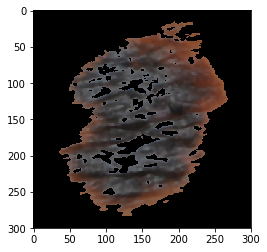

In [149]:
#Preenche os quatro cantos da imagem binária

w, h = mask.shape[::-1]
cv2.floodFill(mask, None, (0, 0), 0)
cv2.floodFill(mask, None, (w-1, 0), 0)
cv2.floodFill(mask, None, (0, h-1), 0)
cv2.floodFill(mask, None, (w-1, h-1), 0)


#Lógica AND para obter da imagem original a encontrada pela criação do mask

img = cv2.bitwise_and(processed_image, processed_image, mask=mask )


img1 = img[:,:,::-1]

plt.imshow(img1)



In [150]:
kernel = np.ones((3,3),np.uint8)

#Canny Edges

edges = cv2.Canny(img, 100,200)
dilate = cv2.dilate(edges,kernel,iterations=1)
dilate = cv2.bitwise_not(dilate)


In [151]:
#Lógica OR para retirar da imagem original os pêlos encontrados

img = cv2.bitwise_or(img, img, mask=dilate )
#cv2.imshow('Edges',img)
#cv2.waitKey(0)

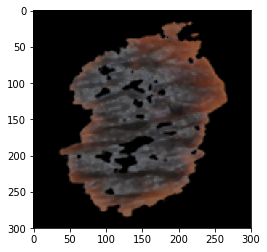

In [152]:
#Interpolação da imagem para preencher os vazios

dilate = cv2.bitwise_not(dilate)
inpaint = cv2.inpaint(img, dilate, 3,cv2.INPAINT_TELEA)


inpaint1 = inpaint[:,:,::-1]

plt.imshow(inpaint1)


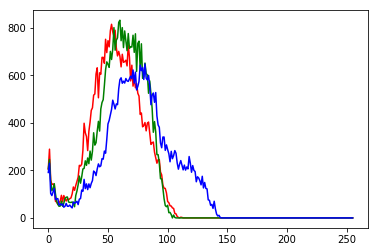

153.92578125
153.953125
153.95703125
240.74366760253906
254.1019744873047
198.81944274902344


In [155]:
#processamento cor

hist1 = cv2.calcHist([inpaint], [0], None, [256], [1, 256])
hist2 = cv2.calcHist([inpaint], [1], None, [256], [1, 256])
hist3 = cv2.calcHist([inpaint], [2], None, [256], [1, 256])
   
mean1 = np.mean(hist1).item()
mean2 = np.mean(hist2).item()
mean3 = np.mean(hist3).item()

std1 = np.std(hist1).item()
std2 = np.std(hist2).item()
std3 = np.std(hist3).item()

plt.plot(hist1, color='r')
plt.plot(hist2, color='g')
plt.plot(hist3, color='b')

plt.show()


print(mean1)
print(mean2)
print(mean3)

print(std1)
print(std2)
print(std3)



In [156]:
# analise simetria


gray = cv2.cvtColor(processed_image1, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret,thresh = cv2.threshold(blur,70,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#im2, contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours,hierachy=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

max_cnt = max(contours, key=cv2.contourArea)

ellipse = cv2.fitEllipse(max_cnt)
ellipse_pnts = cv2.ellipse2Poly( (int(ellipse[0][0]),int(ellipse[0][1]) ) ,( int(ellipse[1][0]),int(ellipse[1][1]) ),int(ellipse[2]),0,360,1)
comp = cv2.matchShapes(max_cnt,ellipse_pnts,1,0.0)

print(comp)



0.03483454974901756


In [157]:
# mypath='melanoma_database'

#onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
#cores=(len(onlyfiles),9)
#cores=np.zeros(cores)
#for n in range(0, len(onlyfiles)):
 #   Itmp = cv2.imread( join(mypath,onlyfiles[n]) )
#Itmp=cv2.imread('/home/pesquisador2/melanoma/MelanomaPDI/melanoma_database/5.jpg')
 #   linhas,colunas,canais=Itmp.shape
#    Itmphsv=cv2.cvtColor(Itmp,cv2.COLOR_BGR2HSV)

  #  print('Estamos na imagem {} melanoma'.format(n))
#f= open("data_color.txt","w+")


#df = pd.DataFrame(cores)
#df.to_csv("melanomas_cropped_cor.csv",header=None,index=None)
#print(df)


In [166]:
image = inpaint1


# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.imshow('Canny Edges', edged)
cv2.waitKey(0)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()



# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.imshow('Canny Edges', edged)
cv2.waitKey(0)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of Contours found = 28
Number of Contours found = 28


In [118]:
#https://github.com/imvinod/Computer-Vision-OpenCV3-Udemy

In [180]:
# Load the shape template or reference image
template = cv2.imread('melanoma/118.jpg',0)
cv2.imshow('Template', template)
cv2.waitKey()

# Load the target image with the shapes we're trying to match
target = cv2.imread('melanoma/118.jpg')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# Threshold both images first before using cv2.findContours
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Find contours in template
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour = contours[1]

# Extract contours from second target image
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
i=0
for c in contours:
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
   
    # If the match value is less than 0.15 we
    if match < 0.15:
        closest_contour = c
        i=i+1
    else:
        i=i-1
            
            
print (i)







-1046
